In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def make_data(n=50, noise=0.3):
    x = np.random.rand(n) * 10
    err = np.random.normal(size=n) * noise
    y = np.sin(x) + err
    return x, y

In [3]:
x_train, y_train = make_data()

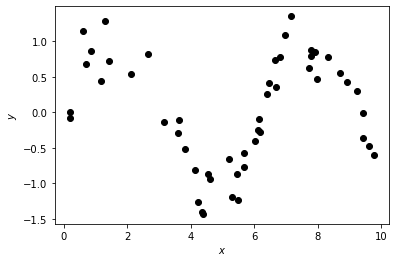

In [4]:
plt.scatter(x_train, y_train, color='k')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.savefig('figures/sin_data.pdf')

In [5]:
X_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [6]:
x_test, y_test = make_data(n=25)
X_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2):
    return Pipeline([('poly', PolynomialFeatures(degree)),
                     ('reg', LinearRegression())])

In [8]:
model = PolynomialRegression(5)
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('reg', LinearRegression())])

In [9]:
train_score = model.score(X_train, y_train)
print(f'R2 score (train): {train_score:.5f}')

test_score = model.score(X_test, y_test)
print(f'R2 score (test): {test_score:.5f}')

R2 score (train): 0.81307
R2 score (test): 0.71158


In [10]:
model = PolynomialRegression(20)
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('reg', LinearRegression())])

In [11]:
train_score = model.score(X_train, y_train)
print(f'R2 score (train): {train_score:.5f}')

test_score = model.score(X_test, y_test)
print(f'R2 score (test): {test_score:.5f}')

R2 score (train): 0.87286
R2 score (test): 0.57482


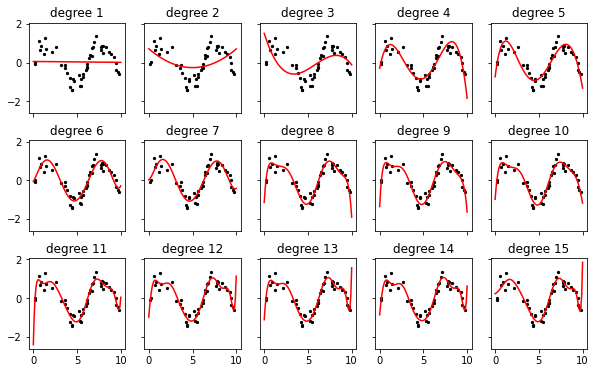

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)
X = np.linspace(0, 10, 100).reshape(-1, 1)

for ax, degree in zip(axes.flat, range(1, 16)):
    ax.scatter(X_train, y_train, color='k', s=5)
    
    reg = PolynomialRegression(degree)
    reg.fit(X_train, y_train)
    
    y = reg.predict(X)    
    ax.plot(X, y, color='r')
    ax.set_title(f'degree {degree}')
    
plt.savefig('figures/varying_poly_degree.pdf')

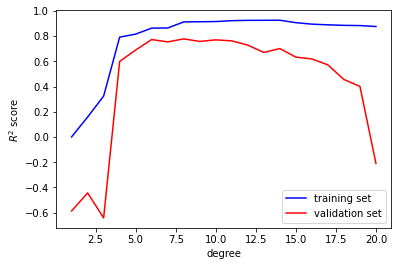

In [13]:
from sklearn.model_selection import validation_curve

degree = np.arange(1, 21)
train_scores, val_scores = validation_curve(
                                PolynomialRegression(), 
                                X_train, y_train, 
                                param_name='poly__degree', 
                                param_range=degree, 
                                cv=10
                           )
plt.plot(degree, np.mean(train_scores, axis=1), 'b', label='training set')
plt.plot(degree, np.mean(val_scores, axis=1), 'r', label='validation set')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$ score')

plt.savefig('figures/validation_curve.pdf')

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly__degree': np.arange(1, 21),
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'poly__degree': 8}
